In [6]:
import path
import libs.checker as checker
from control import *
from z3 import *
from scipy.signal import lti, step

As shown by *ex.car-numeric.py*, the safety requirement is too restrict for its design.

In this example, we relax the safety requirement by:
$$
\forall t . y(t) <= r  
$$

change to:
$$
\forall t . y(t) <= 2*r  
$$

Thus, we expect the numeric checking, in this example, returns *unsat*, which suggests the design met the relaxed safety requirement.

In [7]:
# Constants
Kp = 2
Kd = 0.14
r = 1

# Approximated Design
n = [Kp]
d = [1, Kd, Kp]
Hs_hat = lti(n,d)
t2, s2 = step(Hs_hat)

# Chars calculation
wn_square = d[-1]
two_zeta_wn = d[-2]

omega_n = math.sqrt(wn_square)
zeta = two_zeta_wn/(2*omega_n)

print(f'zeta = {zeta}, omega_n = {omega_n}')

zeta = 0.049497474683058325, omega_n = 1.4142135623730951


In [8]:
# Setup
c = checker.Checker(zeta,omega_n)

p = c.factory.y
t = c.factory.t
c.amp = 1       
r = c.amp
safety = p[t] <= 2*r

c.auto_pog(safety)


In [9]:
# Numerical Static Checking in Z3 SMT solver
c.result()

static checking result =  unsat


The checking result confirm our expectation on this example. We can plot the transfer function to confirm:

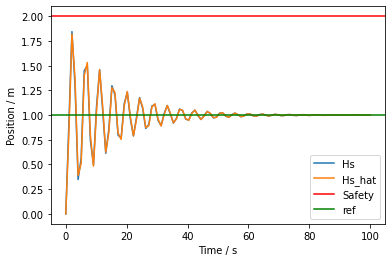

In [10]:
from matplotlib import pyplot as p
import numpy as np

# Original Transfer function
Hs_num = [Kd, Kp]
Hs_den = [1, Kd, Kp]
Hs = lti(Hs_num, Hs_den)
t1, s1 = step(Hs)

p.plot(t1, s1, label='Hs')
p.plot(t2, s2, label='Hs_hat')
p.axhline(y=2*r, color='r', label='Safety')
p.axhline(y=r, color='g', label='ref')
p.xlabel('Time / s')
p.ylabel('Position / m')
p.legend()
p.show()

Notice that when our checker returns $unsat$, it doesn't mean the design is absolutely safe/correct. It just indicates that our checker doesn't find any requirement violation, and user might proceed with the next design evaluation steps.